# Определение факторов успешности игр

Смоделируем ситуацию для интернет-магазина «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед нами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируем ли мы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

**Описание данных**

* Name — название игры

* Platform — платформа

* Year_of_Release — год выпуска

* Genre — жанр игры

* NA_sales — продажи в Северной Америке (миллионы проданных копий)

* EU_sales — продажи в Европе (миллионы проданных копий)

* JP_sales — продажи в Японии (миллионы проданных копий)

* Other_sales — продажи в других странах (миллионы проданных копий)

* Critic_Score — оценка критиков (максимум 100)

* User_Score — оценка пользователей (максимум 10)

* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.


## Изучение файла с данными и общей информации

In [42]:
#импортируем необходимые библиотеки и отключаем необходимые предупреждения
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import pingouin as pg
from scipy.stats import mannwhitneyu
from scipy.stats import norm
from urllib.parse import urlencode 
from tqdm.auto import tqdm
import warnings
warnings.simplefilter('ignore')
import plotly.io as pio
pio.renderers.default='notebook'
import warnings
warnings.simplefilter('ignore')


In [2]:
#открываем файл и знакомимся с общей информацией
df = pd.read_csv('/Users/dmitrijvolgin/Downloads/Я_Практикум/Проекты/Сборный проект1/games.csv')
display(df.head())
df.info()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [3]:
print('Количество явных дубликатов =',df.duplicated().sum())
print('Количество пропусков:','\n',df.isna().sum())

Количество явных дубликатов = 0
Количество пропусков: 
 Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64


In [4]:
#изучаем уникальные значения в столбцах
columns_to_unique = ['Name', 'Platform', 'Year_of_Release', 'Genre', 'Critic_Score', 'User_Score', 'Rating']

for t in columns_to_unique:
    print(t)
    display(df[t].sort_values().unique())

Name


array([' Beyblade Burst', ' Fire Emblem Fates', " Frozen: Olaf's Quest",
       ..., 'wwe Smackdown vs. Raw 2006', '¡Shin Chan Flipa en colores!',
       nan], dtype=object)

Platform


array(['2600', '3DO', '3DS', 'DC', 'DS', 'GB', 'GBA', 'GC', 'GEN', 'GG',
       'N64', 'NES', 'NG', 'PC', 'PCFX', 'PS', 'PS2', 'PS3', 'PS4', 'PSP',
       'PSV', 'SAT', 'SCD', 'SNES', 'TG16', 'WS', 'Wii', 'WiiU', 'X360',
       'XB', 'XOne'], dtype=object)

Year_of_Release


array([1980., 1981., 1982., 1983., 1984., 1985., 1986., 1987., 1988.,
       1989., 1990., 1991., 1992., 1993., 1994., 1995., 1996., 1997.,
       1998., 1999., 2000., 2001., 2002., 2003., 2004., 2005., 2006.,
       2007., 2008., 2009., 2010., 2011., 2012., 2013., 2014., 2015.,
       2016.,   nan])

Genre


array(['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy', nan], dtype=object)

Critic_Score


array([13., 17., 19., 20., 21., 22., 23., 24., 25., 26., 27., 28., 29.,
       30., 31., 32., 33., 34., 35., 36., 37., 38., 39., 40., 41., 42.,
       43., 44., 45., 46., 47., 48., 49., 50., 51., 52., 53., 54., 55.,
       56., 57., 58., 59., 60., 61., 62., 63., 64., 65., 66., 67., 68.,
       69., 70., 71., 72., 73., 74., 75., 76., 77., 78., 79., 80., 81.,
       82., 83., 84., 85., 86., 87., 88., 89., 90., 91., 92., 93., 94.,
       95., 96., 97., 98., nan])

User_Score


array(['0', '0.2', '0.3', '0.5', '0.6', '0.7', '0.9', '1', '1.1', '1.2',
       '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '1.9', '2', '2.1', '2.2',
       '2.3', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9', '3', '3.1', '3.2',
       '3.3', '3.4', '3.5', '3.6', '3.7', '3.8', '3.9', '4', '4.1', '4.2',
       '4.3', '4.4', '4.5', '4.6', '4.7', '4.8', '4.9', '5', '5.1', '5.2',
       '5.3', '5.4', '5.5', '5.6', '5.7', '5.8', '5.9', '6', '6.1', '6.2',
       '6.3', '6.4', '6.5', '6.6', '6.7', '6.8', '6.9', '7', '7.1', '7.2',
       '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '8', '8.1', '8.2',
       '8.3', '8.4', '8.5', '8.6', '8.7', '8.8', '8.9', '9', '9.1', '9.2',
       '9.3', '9.4', '9.5', '9.6', '9.7', 'tbd', nan], dtype=object)

Rating


array(['AO', 'E', 'E10+', 'EC', 'K-A', 'M', 'RP', 'T', nan], dtype=object)

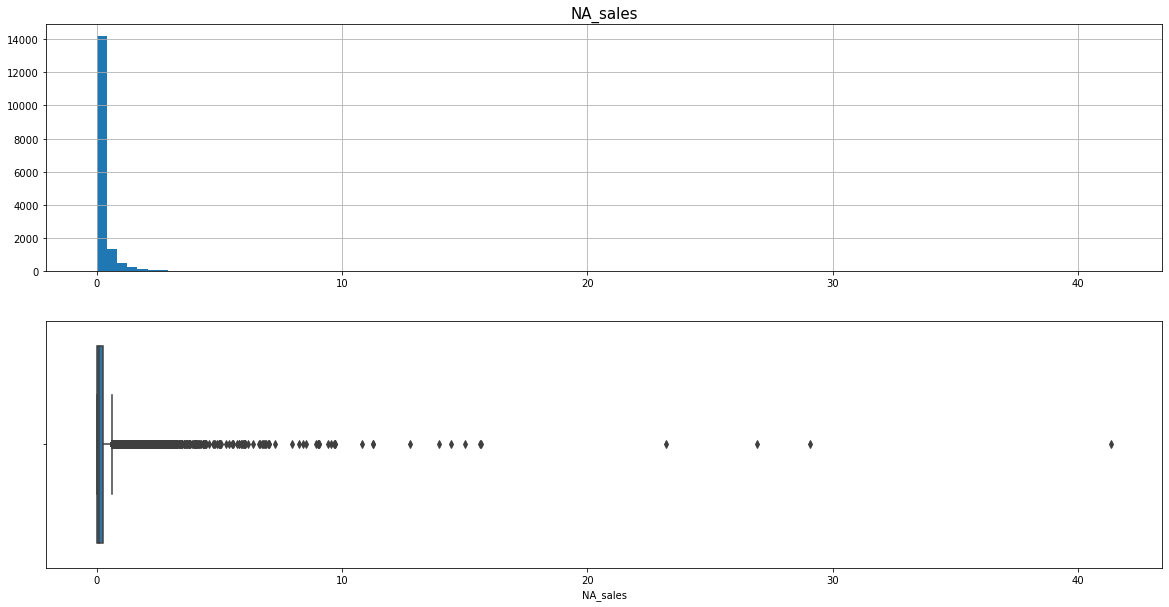

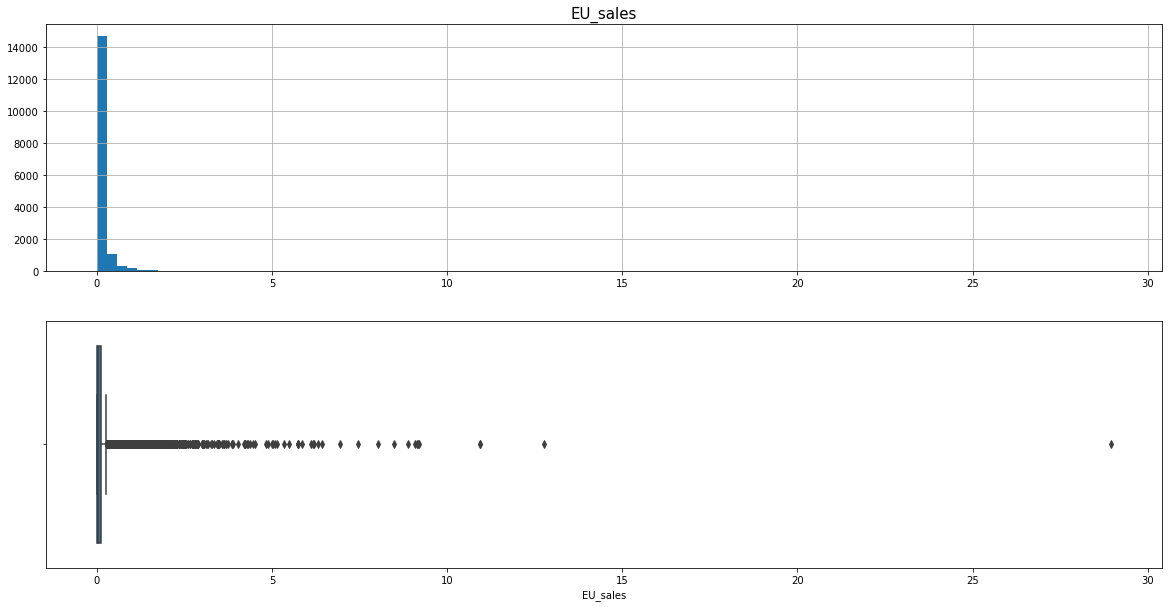

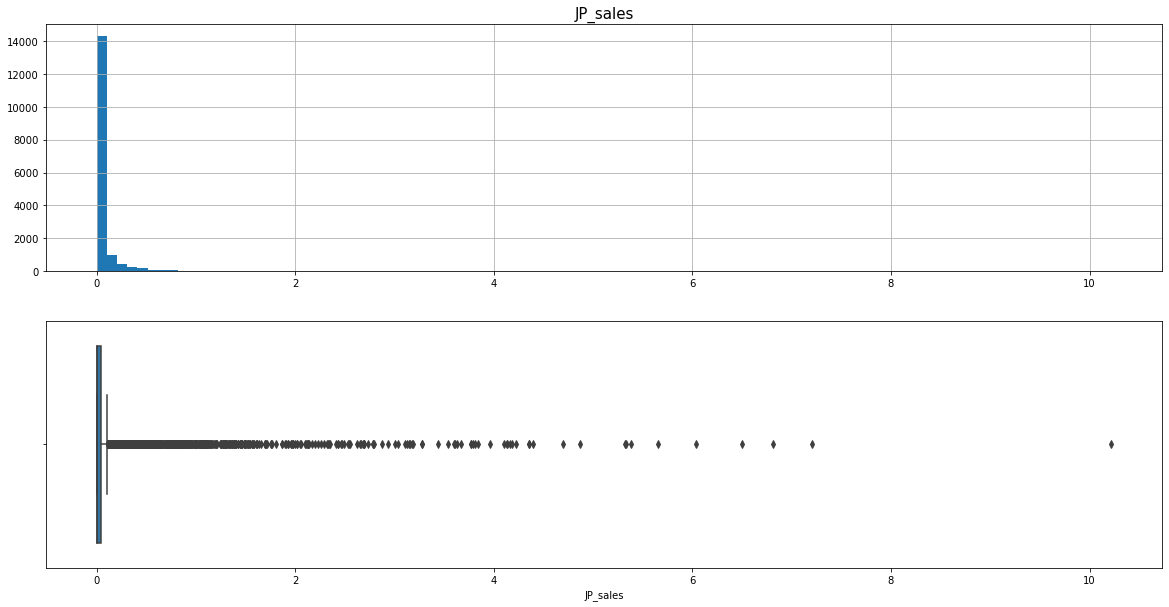

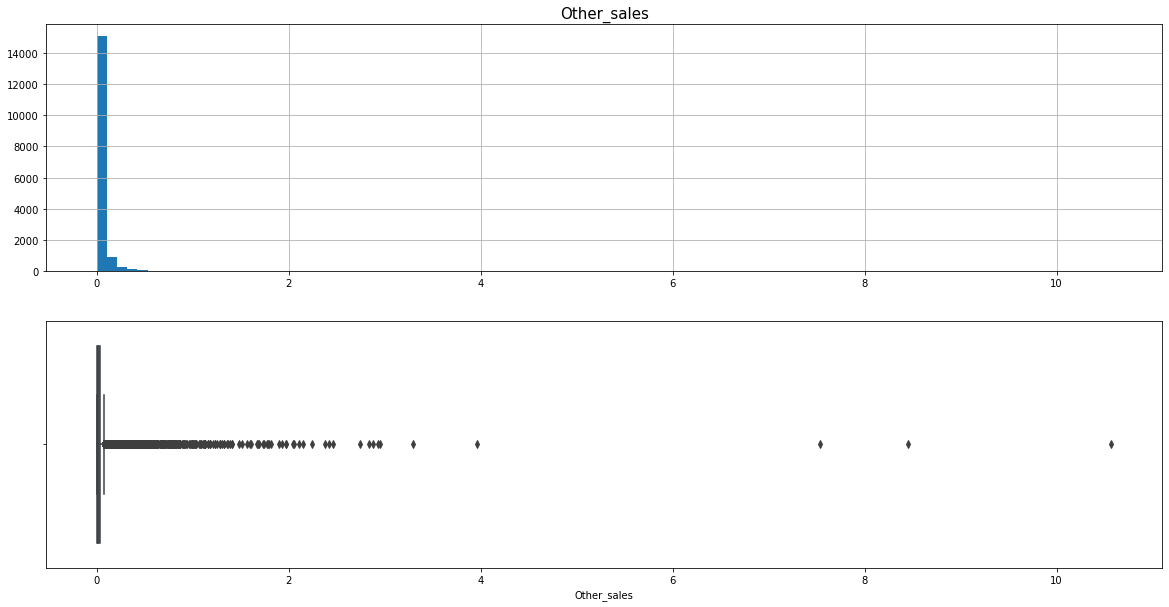

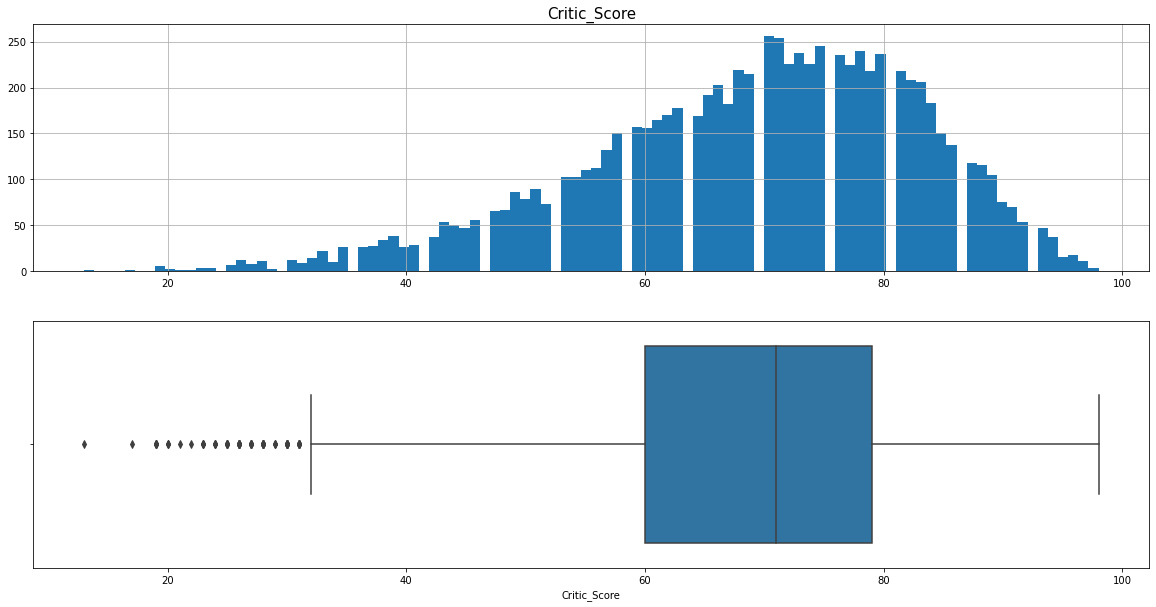

In [5]:
# рассмотрим распределения по основным столбцам
columns_list = ['NA_sales', 'EU_sales', 'JP_sales', 'Other_sales', 'Critic_Score']

for i in columns_list: 
    plt.figure(figsize=(20, 10))
    plt.subplot(2, 1, 1)
    df[i].hist(bins=100)
    plt.title(i, fontsize=15)
    plt.subplot(2, 1, 2)
    sns.boxplot(df[i])
    plt.show()

### Вывод

В рамках ознакомления с данными заметил, что значения столбцов необходимо привести к нижниму регистру и добавить столбец с суммарными продажами по регионам.
Необходимо заменить тип данных в столбцах:
* year_of_release на целочисленный, так как в роли годы может выступать только целое число.
* user_score на вещественный, так как тип object не подходит для столбца, в котором подразумеваются только числовые значения
В столбце user_score быо обнаружено значение tbd(to be determined или будет определено), по каким то причинам этих данных нет, поэтому заменим их пропусками.

Также в остальных столбцах были найдены пропуски:
* name, genre - всего две строки с минимальными продажами, поэтому нужно исключить их из дальнейшего анализа.
* rating - адекватной замены нет, поэтому заменим их на unknown.
* critic_score и user_score - заменим пропуски на медианное значение в зависимости от платформы, жанра и даты выхода игры.

Рассмотрев гистограммы для столбцов с продажами мы выдим, что они имеют распределение Фишера с большим хвостом выбросов в правую сторону. Оценки критиков имеют околонормальный вид.

## Подготовка данных

In [6]:
# преведем наименования столбцов к нижнему регистру

df.columns = df.columns.str.lower()
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [7]:
#заменим пропущенные значения в столбце с рейтингом на unknown

df['rating'] = df['rating'].fillna('unknown')

In [8]:
#заменяем значение 'tbd' в стобце 'user_score' на пропущенные значения

df.loc[df['user_score'] == 'tbd', 'user_score'] = np.nan

In [9]:
# изменяем типы данных для столбцов user_score и year_of_release

df['user_score'] = pd.to_numeric(df['user_score']) 
df['year_of_release'] = round(df['year_of_release']).astype('Int64')

In [10]:
# смотрим на строки с пропущенными значениями в столбцах name и genre

df.loc[(df['name'].isna() == True)] 

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,unknown
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,unknown


In [11]:
# смотрим на строки с пропущенными значениями в столбце year_of_release

df_year = df.loc[(df['year_of_release'].isna() == True)]
print(df_year.isna().sum())
df_year.head()

name                 0
platform             0
year_of_release    269
genre                0
na_sales             0
eu_sales             0
jp_sales             0
other_sales          0
critic_score       115
user_score         142
rating               0
dtype: int64


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,<NA>,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,<NA>,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,<NA>,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,<NA>,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,unknown
609,Space Invaders,2600,<NA>,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,unknown


In [12]:
#искючаем строки с пропусками в столбцах name и genre

df_good = df.loc[(df['name'].isna() != True)]
df_good.isna().sum()


name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         9123
rating                0
dtype: int64

In [13]:
#добавляем столбец с суммарными продажами
df_good['sum_sales'] = df_good['na_sales'] + df_good['eu_sales'] + df_good['jp_sales'] + df_good['other_sales']

### Вывод

В рамках подготовки данных привел значения столбцов к нижниму регистру и добавил столбец с суммарными продажами по регионам.
Заменен тип данных в столбцах:
* year_of_release на целочисленный, так как в роли годы может выступать только целое число.
* user_score на вещественный, так как тип object не подходит для столбца, в котором подразумеваются только числовые значения
В столбце user_score быо обнаружено значение tbd(to be determined или будет определено), по каким то причинам этих данных нет, поэтому заменим их пропусками.

Также в остальных столбцах были найдены пропуски:
* name, genre - всего две строки с минимальными продажами, поэтому исключил их из дальнейшего анализа.
* rating - адекватной замены нет, поэтому заменим их на unknown.
* critic_score и user_score - заменим пропуски(которые возможно) на медианное значение в зависимости от платформы, жанра и даты выхода игры.

Данные готовы для дальнейшего анализа.

## Анализ данных

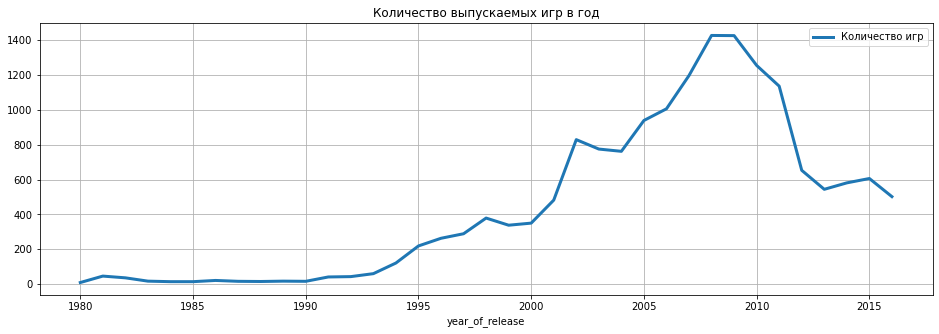

In [14]:
#смотрим как изменялось количество выпускаемых игр 

pivot_count = df_good.pivot_table(index=['year_of_release'], values='name', aggfunc='count')
pivot_count.columns = ['Количество игр']
pivot_count.plot(linewidth=3,
                 grid=True,
                 figsize=(16,5),
                 kind='line')

plt.title('Количество выпускаемых игр в год')
plt.show()

В рамках анаиза выпуска количества игр в год видно, что рост начинается только с 1990г., до этого момента количество выпускаемых игр было минимально. Основной пик пришелся на 2008-2009г., даллее наблюдаем спад.

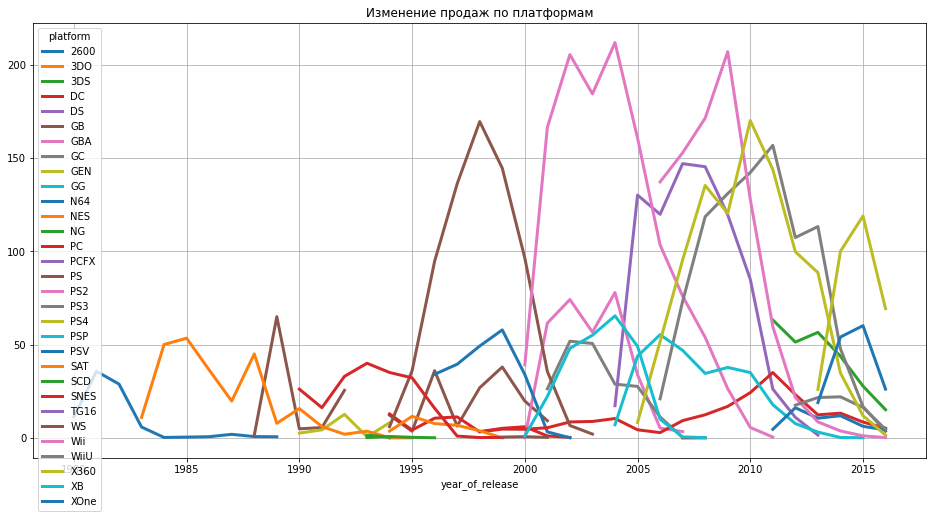

In [15]:
# смотрим на изменение продаж по платформам
pivot_sales = df_good.pivot_table(index=['year_of_release'], columns = 'platform', values='sum_sales', aggfunc='sum')

pivot_sales.plot(
    linewidth=3,
    grid=True,
    figsize=(16,8),
    kind='line'      
)
plt.title('Изменение продаж по платформам')
plt.show()

In [16]:
#определяем топ 10 продоваемых платформ
pivot_sales_top = df_good.pivot_table(index=['platform'], values='sum_sales', aggfunc='sum')
pivot_sales_top.columns = ['sum_sales'] 
pivot_sales_top_10 = pivot_sales_top.sort_values(by='sum_sales', ascending=False).head(10)
pivot_sales_top_10


,sum_sales
platform,
PS2,1255.77
X360,971.42
PS3,939.65
Wii,907.51
DS,806.12
PS,730.86
GBA,317.85
PS4,314.14
PSP,294.05


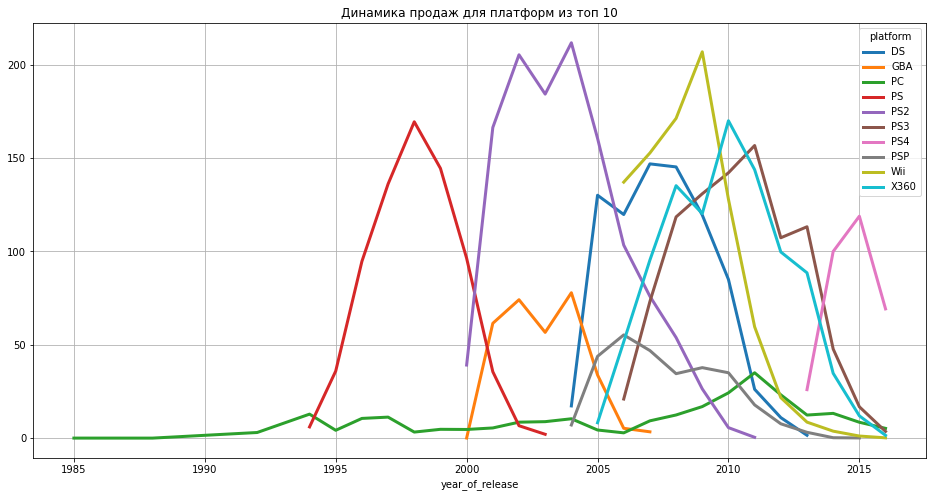

In [17]:
# изучаем динамику продаж для платформ из топ 10
df_good_sales_top_10 = df_good[df_good['platform'].isin(pivot_sales_top_10.index)]
df_good_sales_top_10.pivot_table(index=['year_of_release'], columns = 'platform', values='sum_sales', aggfunc='sum') \
                    .plot(linewidth=3,
                          grid=True,
                          figsize=(16,8),
                          kind='line')
plt.title('Динамика продаж для платформ из топ 10')
plt.show()


Рассмотрев динамику суммарнах продаж по платформам видно, что большинство из них имеют нормальное распределение с различной дисперсией. Для большей нагядности мы определили топ 10 продоваемых платформ. По графику видно, что средний срок жизни патформ состовляет около 5 лет, особенно это видно в интервале 2000-2005г. Поэтому для для дальнейшего анализа мы определим актуальный период сроком 5 лет - 2012-2016г.

In [18]:
# определяем актуальный период как 5 лет 
df_good_actual = df_good[df_good['year_of_release'] >= 2012]

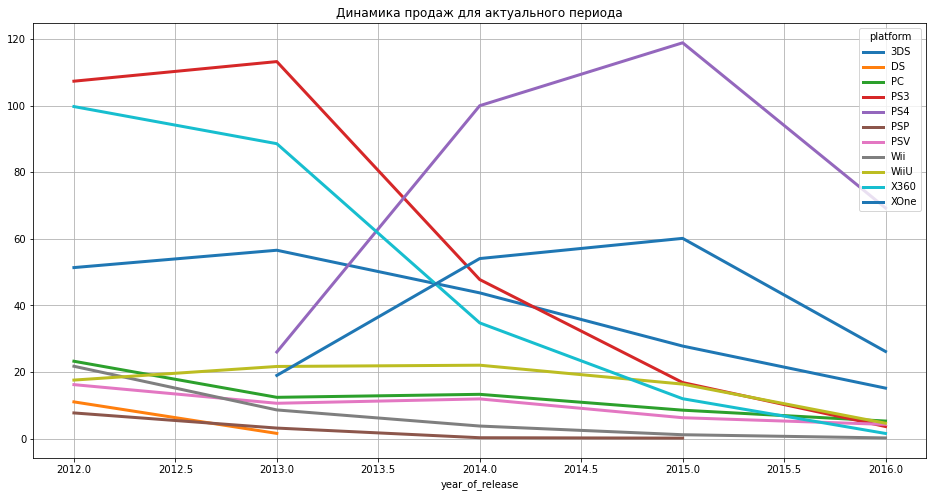

In [19]:
# изучаем динамику продаж платформ за актуальный период
df_good_actual.pivot_table(index=['year_of_release'], columns = 'platform', values='sum_sales', aggfunc='sum').plot(
    linewidth=3,
    grid=True,
    figsize=(16,8),
    kind='line'
)
plt.title('Динамика продаж для актуального периода')
plt.show()

Посмотрев динамику суммарных продаж за актуаьный период можно сделать вывод, что лидерами являются платформы PS4 и XOne, а их предшественники PS3 и X360 стремительно сокращают суммарные продажи после выхода новых версий. На фоне появления PS4 и XOne у платформы 3DS также падают продажи. Учитывая, что срок жизни платформ около 5 лет думаю, что PS4, XOne и 3DS сохранят лидирующие позиции по продажам и в 2017г. Также стоит отметить, что с 2015г. наблюдается уменьшение продаж по всем патформам.

(0.0, 5.0)

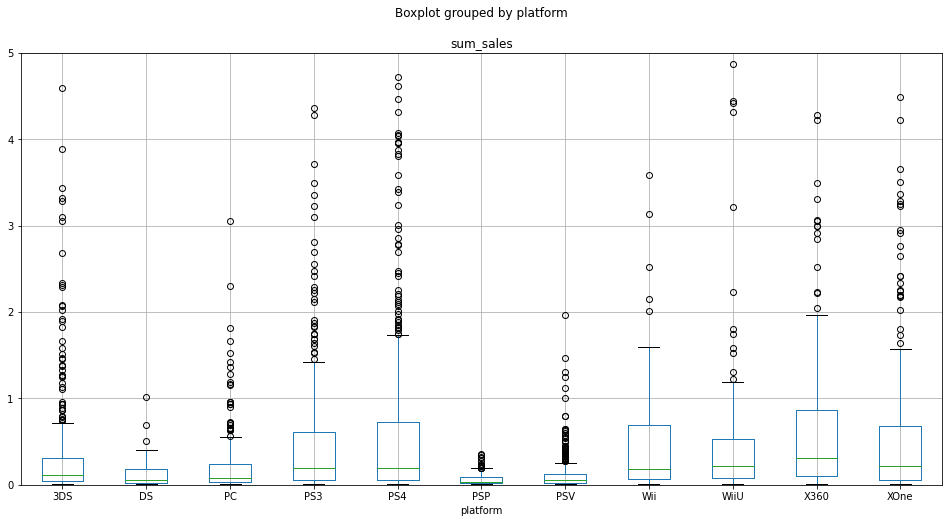

In [20]:
#строим график "ящик с усами" для актуального периода по суммарным продажам в разрезе платформ
df_good_actual.boxplot(column='sum_sales', by='platform', figsize=(16,8))
plt.ylim([0, 5])

Построив график "ящик с усами" мы видим большое количество выбросов, это свидетельствует о том, что бОльшая часть выпущенных игр малопродаваемы. По популярным платформам наблюдаем выбросы после 1-2млн., а по менее популярным платформам не достигает и 1 млн. На основании этого можно сделать вывод, что большая часть платформ живет за счет как раз таки этих выбросов, поэтому их нужно учитывать в дальнейшем анализе.

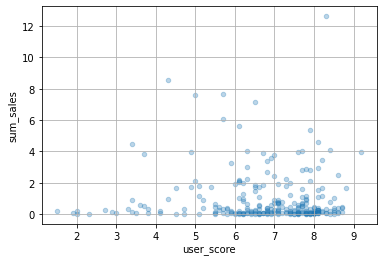

Корреляция между оценкой пользователей и суммарными продажами составляет -0.03195711020455646


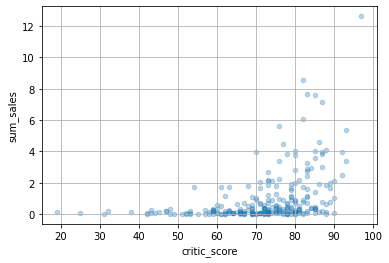

Корреляция между оценкой критиков и суммарными продажами составляет 0.40656790206178145


In [21]:
# смотрим как влияют отзывы критиков и пользователей на продажи в рамках платформы PS4
df_good_actual_ps4 = df_good_actual.query('platform == "PS4"')
df_good_actual_ps4.plot(x='user_score', y='sum_sales', kind='scatter', grid=True, alpha=0.3)
plt.show()
print('Корреляция между оценкой пользователей и суммарными продажами составляет',df_good_actual_ps4['user_score'].corr(df_good_actual_ps4['sum_sales']))
df_good_actual_ps4.plot(x='critic_score', y='sum_sales', kind='scatter', grid=True, alpha=0.3)
plt.show()
print('Корреляция между оценкой критиков и суммарными продажами составляет',df_good_actual_ps4['critic_score'].corr(df_good_actual_ps4['sum_sales']))
#station_stat_full.plot(x='count', y='time_spent', kind='scatter', grid=True)

3DS


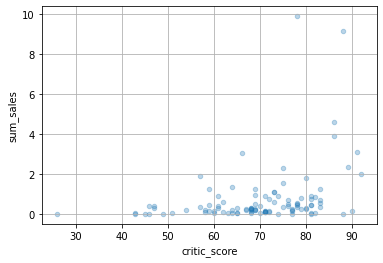

Корреляция между оценкой критиков и суммарными продажами составляет 0.3208028695360786


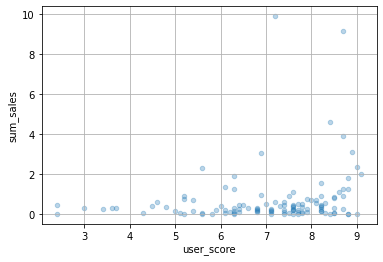

Корреляция между оценкой пользователей и суммарными продажами составляет 0.1975826341103859

DS


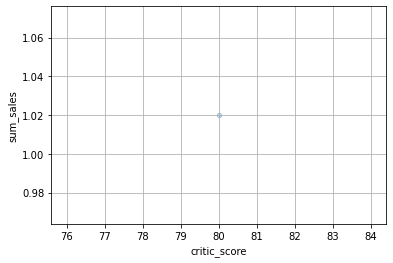

Корреляция между оценкой критиков и суммарными продажами составляет nan


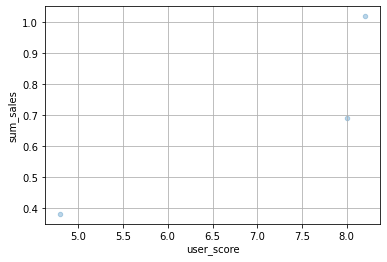

Корреляция между оценкой пользователей и суммарными продажами составляет 0.88270872757644

PC


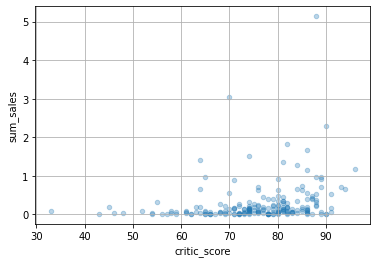

Корреляция между оценкой критиков и суммарными продажами составляет 0.23724324311567896


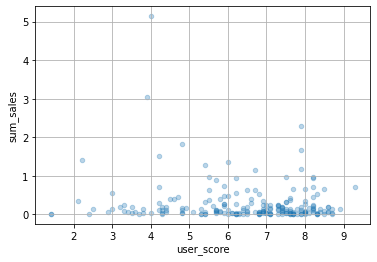

Корреляция между оценкой пользователей и суммарными продажами составляет -0.12186747630735571

PS3


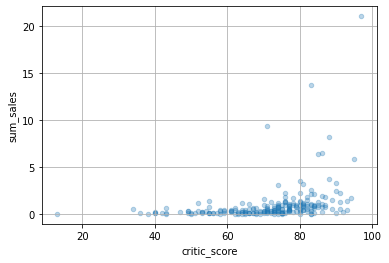

Корреляция между оценкой критиков и суммарными продажами составляет 0.331497259262959


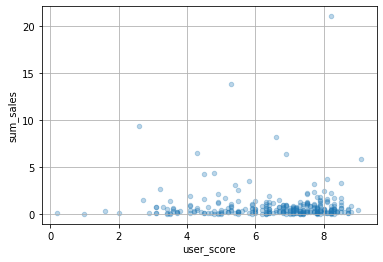

Корреляция между оценкой пользователей и суммарными продажами составляет -0.005143522887113798

PS4


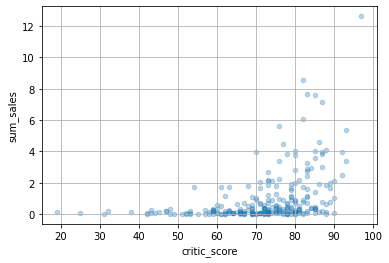

Корреляция между оценкой критиков и суммарными продажами составляет 0.40656790206178145


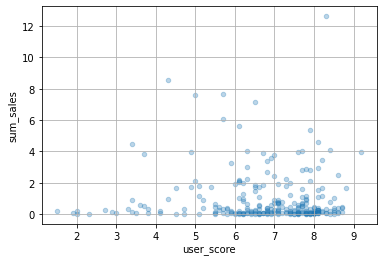

Корреляция между оценкой пользователей и суммарными продажами составляет -0.03195711020455646

PSP


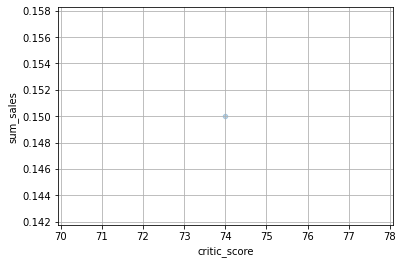

Корреляция между оценкой критиков и суммарными продажами составляет nan


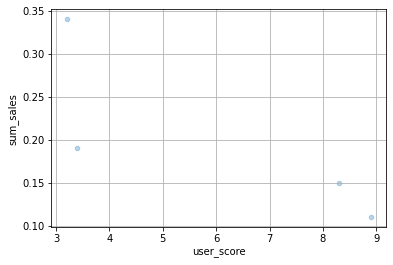

Корреляция между оценкой пользователей и суммарными продажами составляет -0.8023020619393209

PSV


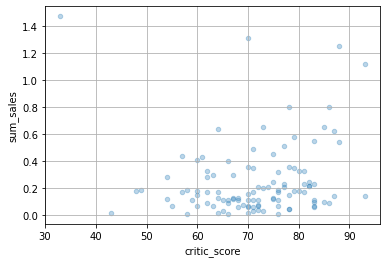

Корреляция между оценкой критиков и суммарными продажами составляет 0.09448789929316175


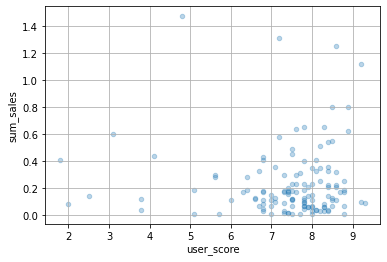

Корреляция между оценкой пользователей и суммарными продажами составляет -0.004339437514314857

Wii


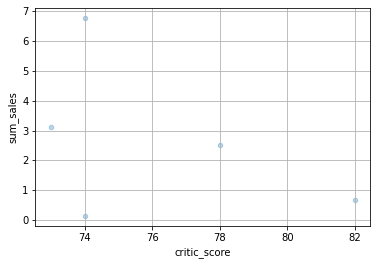

Корреляция между оценкой критиков и суммарными продажами составляет -0.4243413011077496


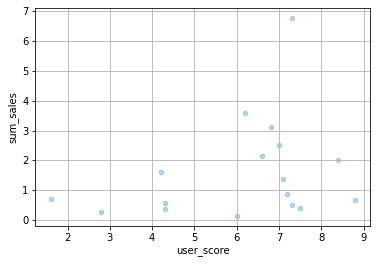

Корреляция между оценкой пользователей и суммарными продажами составляет 0.29619680007479526

WiiU


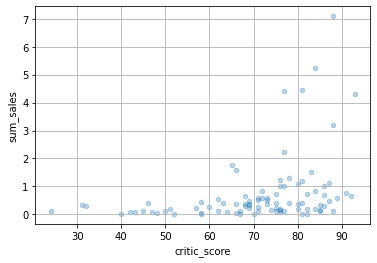

Корреляция между оценкой критиков и суммарными продажами составляет 0.3483797601201749


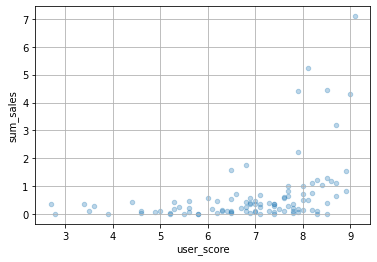

Корреляция между оценкой пользователей и суммарными продажами составляет 0.4002190202148619

X360


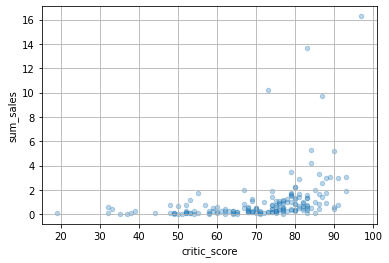

Корреляция между оценкой критиков и суммарными продажами составляет 0.36057348885073387


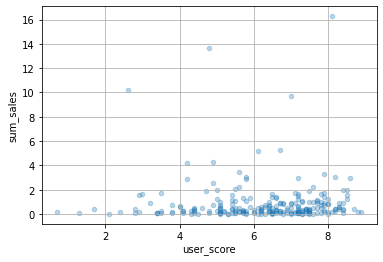

Корреляция между оценкой пользователей и суммарными продажами составляет 0.006163978646213357

XOne


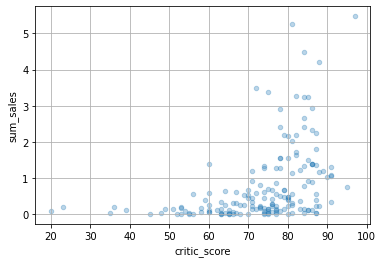

Корреляция между оценкой критиков и суммарными продажами составляет 0.4169983280084016


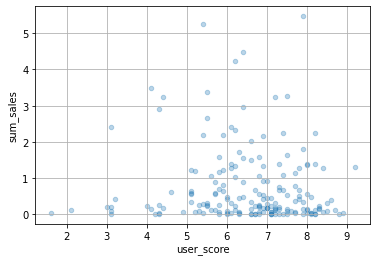

Корреляция между оценкой пользователей и суммарными продажами составляет -0.0689250532827942



In [22]:
# смотрим как влияют отзывы критиков и пользователей на продажи в рамках всех алтформ за актуальный период

for platform, games_on_platform in df_good_actual.groupby('platform'):
    
    print(platform)
    games_on_platform.plot(kind='scatter', x='critic_score', y='sum_sales', grid=True, alpha=0.3)
    plt.show()
    print('Корреляция между оценкой критиков и суммарными продажами составляет',games_on_platform['critic_score'].corr(games_on_platform['sum_sales']))
    games_on_platform.plot(kind='scatter', x='user_score', y='sum_sales', grid=True, alpha=0.3)
    plt.show()
    print('Корреляция между оценкой пользователей и суммарными продажами составляет',games_on_platform['user_score'].corr(games_on_platform['sum_sales']))
    print()

Рассмотрев диаграммы рассеяния и корреляцию по между суммарными продажами и отзывами пользователей и критиков по основным платформам за актуальный период можно сделать вывод, что суммарные продажи имеют небольшую положительную корреляцию с отзывами критиков, а вот с отзвами пользователей корреляция почти отсутствует или минимальная отрицательная. Немного ситуация отличается по платформам японского происхождения, там продажи имеют небольшую корреляцию и с оценкой критиков и пользователей.

<AxesSubplot:>

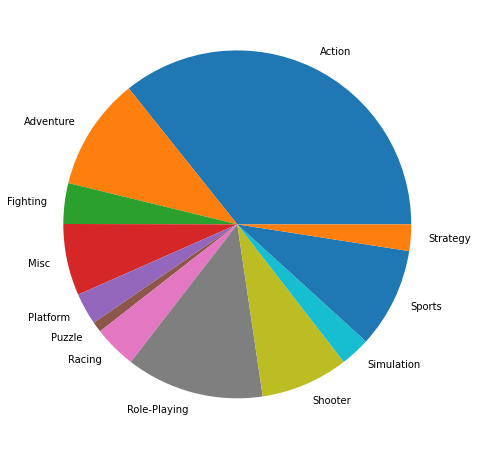

In [23]:
#смотрим общее распределение по жанрам за актуальный период
df_good_actual.groupby('genre')['name'].count().plot(kind='pie', label='', figsize=(8,8))

In [24]:
#смотрим общее распределение по жанрам за актуальный период
df_good_actual.groupby('genre')['name'].count().sort_values(ascending=False)

genre
Action          1031
Role-Playing     370
Adventure        302
Sports           268
Shooter          235
Misc             192
Racing           115
Fighting         109
Platform          85
Simulation        80
Strategy          71
Puzzle            28
Name: name, dtype: int64

Видим, что основной акцент в вупуске игр за актуальный период был сделан на жанр Action, далее можно выделить Role-Playing, Adventure, Sports, Shooter.

<AxesSubplot:xlabel='year_of_release'>

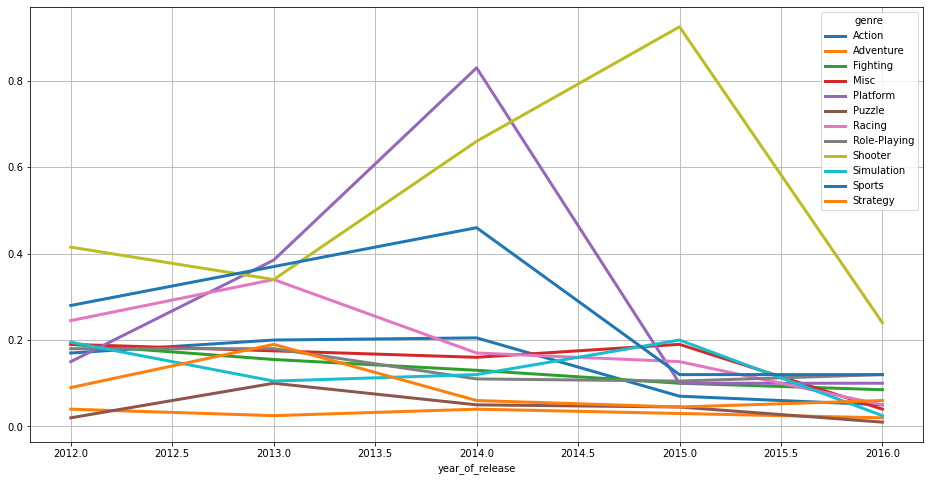

In [25]:
#изучаем динимику продаж в разрезе жанров
df_good_actual.pivot_table(index=['year_of_release'], columns = 'genre', values='sum_sales', aggfunc='median') \
              .plot(linewidth=3,
                    grid=True,
                    figsize=(16,8),
                    kind='line')

In [26]:
#изучаем суммарные продажи в разрезе жанров
df_good_actual.groupby('genre')['sum_sales'].sum().sort_values(ascending=False)

genre
Action          441.12
Shooter         304.73
Role-Playing    192.80
Sports          181.07
Misc             85.04
Platform         61.00
Racing           53.50
Fighting         44.49
Simulation       35.12
Adventure        29.43
Strategy         13.34
Puzzle            4.89
Name: sum_sales, dtype: float64

Рассмотрев суммарные продажи, мы видим, что жанр Action занимает уверенное первое место. Также стоит отметить, что несмотря на то, что жанр Shooter по количеству выпущенных игр занимает лишь пятое место, по суммарным продажам он занимает уверенное второе место.

In [27]:
pivot = df_good_actual.pivot_table(index=['genre'], values='sum_sales', aggfunc=['median', 'mean'])
pivot.columns = ['median_sum_sales', 'mean_sum_sales']
pivot.sort_values(by='median_sum_sales', ascending=False)

,median_sum_sales,mean_sum_sales
genre,,
Shooter,0.440,1.296723
Sports,0.240,0.675634
Platform,0.210,0.717647
Role-Playing,0.140,0.521081
Racing,0.140,0.465217
Fighting,0.130,0.408165
Action,0.120,0.427856
Misc,0.120,0.442917
Simulation,0.120,0.439000


Несмотря на то, что по общим продажам среди жанров абсолютным лидером является Action(обусловлено количеством выпущенных игр) наиболее стабильно игры продаются с жанром Shooter, далее можно выделить Sports, Platform. А вот аутсайдеры не изменились - Adventure, Puzzle, Strategy.

### Вывод

В рамках анаиза выпуска количества игр в год видно, что рост начинается только с 1990г., до этого момента количество выпускаемых игр было минимально. Основной пик пришелся на 2008-2009г., даллее наблюдаем спад.

Рассмотрев динамику суммарнах продаж по платформам видно, что большинство из них имеют нормальное распределение с различной дисперсией. Для большей нагядности мы определили топ 10 продоваемых платформ. По графику видно, что средний срок жизни патформ состовляет около 5 лет, особенно это видно в интервале 2000-2005г. Поэтому для для дальнейшего анализа мы определим актуальный период сроком 5 лет - 2012-2016г.

Посмотрев динамику суммарных продаж за актуаьный период можно сделать вывод, что лидерами являются платформы PS4 и XOne, а их предшественники PS3 и X360 стремительно сокращают суммарные продажи после выхода новых версий. На фоне появления PS4 и XOne у платформы 3DS также падают продажи. Учитывая, что срок жизни платформ около 5 лет думаю, что PS4, XOne и 3DS сохранят лидирующие позиции по продажам и в 2017г. Также стоит отметить, что с 2015г. наблюдается уменьшение продаж по всем патформам.

Построив график "ящик с усами" мы видим большое количество выбросов, это свидетельствует о том, что бОльшая часть выпущенных игр малопродаваемы. По популярным платформам наблюдаем выбросы после 1-2млн., а по менее популярным платформам не достигает и 1 млн. На основании этого можно сделать вывод, что большая часть платформ живет за счет как раз таки этих выбросов, поэтому их нужно учитывать в дальнейшем анализе. 

Рассмотрев диаграммы рассеяния и корреляцию по между суммарными продажами и отзывами пользователей и критиков по основным платформам за актуальный период можно сделать вывод, что суммарные продажи имеют небольшую положительную корреляцию с отзывами критиков, а вот с отзвами пользователей корреляция почти отсутствует или минимальная отрицательная. Немного ситуация отличается по платформам японского происхождения, там продажи имеют небольшую корреляцию и с оценкой критиков и пользователей.

Рассмотрев общее распределение игровых жанров по суммарным продажам можно выделить жанры Action, Shooter как абсолюных лидеров, Role-Playing и Sports как просто лидеров, Strategy и Puzzle как аутсайдеров. Но если не учитывать фактор количества выпущенных игр и посмотреть на медианные продажи игровых жанров, то картина несколько меняется - абсолютным лидером предстает жанр Shooter, второе и третье место Sports, Platform соотвественно, а жанр Action с лидерских позиций переместился в "середнячки", но аутсайдеры не изменились - Adventure, Puzzle, Strategy.

## Изучение особенностей пользователя в разрезе регионов продаж

In [28]:
#определяем для каждого региона продаж топ 5 самых продоваемых платформ и жанров
df_good_actual_pivot_platform = df_good_actual.pivot_table(index=['platform'], values=['na_sales','eu_sales','jp_sales','other_sales'], aggfunc='sum')
df_good_actual_pivot_genre = df_good_actual.pivot_table(index=['genre'], values=['na_sales','eu_sales','jp_sales','other_sales'], aggfunc='sum')

region = ['na_sales','eu_sales','jp_sales','other_sales']

for t in region:
    print('Самые продоваемые платформы для региона', t)
    print(df_good_actual_pivot_platform.sort_values(by=t, ascending=False).head())
    print()
    print('Самые продоваемые жанры для региона', t)
    print(df_good_actual_pivot_genre.sort_values(by=t, ascending=False).head())
    print('###########################################')
    print()


Самые продоваемые платформы для региона na_sales
          eu_sales  jp_sales  na_sales  other_sales
platform                                           
X360         74.52      1.57    140.05        20.40
PS4         141.09     15.96    108.74        48.35
PS3         106.86     35.29    103.38        43.26
XOne         51.59      0.34     93.12        14.27
3DS          42.64     87.79     55.31         8.87

Самые продоваемые жанры для региона na_sales
              eu_sales  jp_sales  na_sales  other_sales
genre                                                  
Action          159.34     52.80    177.84        51.14
Shooter         113.47      9.23    144.77        37.26
Sports           69.09      8.01     81.53        22.44
Role-Playing     48.53     65.44     64.00        14.83
Misc             26.32     12.86     38.19         7.67
###########################################

Самые продоваемые платформы для региона eu_sales
          eu_sales  jp_sales  na_sales  other_sales
pla

Рассмотрев суммарные продажи за актуальный период можем сделать выводы:
* Для Северной Америки абсолютным лидером является платформа X360, далее идут платформы PS4, PS3, XOne и замыкает пятерку лидеров 3DS. В рамках жанров подавляющее большинство продаж приходится на Action и Shooter, далее уменьшению суммы продаж идут Sports, Role-Playing, Misc. По сумме продаж видно, что наибоьшой популярностью игровые платформы пользуются именно в Северной Америке.
* Для Европейского региона лидируют платформы PS4, PS3, далее идут платформы X360, XOne и замыкает пятерку лидеров 3DS. Распределение по жанрам очень похоже на Северную Америку подавляющее большинство продаж приходится на Action и Shooter, далее уменьшению суммы продаж идут Sports, Role-Playing и Racing. По количеству продаж европейский регион занимает второе место. 
* А вот картина в Японии сильно отличается от остальных регионов. Абсолютным лидером по платформам является 3DS, далее идут PS3, PSV, PS4, WiiU. Здесь уже лидируют платформы выпущенные в Японии 3DS,PSV,WiiU. В части жанров также ситуация координально отличается, в лидерах Role-Playing,Action, далее идут Misc,Simulation,Fighting. По количеству продаж Япония регион занимает третье место.
* По остальным регионам продаж ситуация такая же как и для европейского региона, за исключением того факта, что суммарные продажи намного меньше и в части популярных жанров Racing заменяется на Misc.

In [29]:
#определяем самые продоваемые рейтинги ESRB
df_good_actual.pivot_table(index=['rating'], values=['na_sales','eu_sales','jp_sales','other_sales'], aggfunc='mean')


,eu_sales,jp_sales,na_sales,other_sales
rating,,,,
E,0.286152,0.071722,0.289544,0.079595
E10+,0.180948,0.026765,0.247386,0.053039
M,0.389478,0.042570,0.465000,0.127269
T,0.128544,0.063155,0.160243,0.043544
unknown,0.071765,0.085365,0.081027,0.021310


Проанализировав средние продажи игр в разрезе рейтингов ESRB мы видим, что для Северной Америки, Европы и остальных регионов преобладает рейтинг М(17+ лет), который подразумевает достаточно жестокое насилие, большое количество крови с расчленением, непристойные сексуальные сцены или грубую ненормативную лексику. 

В Японии же преобладают игры с неопределенным рейтингом ESRB, далее идут рейтинги E(6+ лет) и Т(13+ лет). Вероятнее всего игры с неопределенным рейтингом ESRB имеют рейтинг японской организации, которая проставляет рейтинги играм - CERO.

### Вывод

Рассмотрев суммарные продажи за актуальный период можем сделать выводы:
* Для Северной Америки абсолютным лидером является платформа X360, далее идут платформы PS4, PS3, XOne и замыкает пятерку лидеров 3DS. В рамках жанров подавляющее большинство продаж приходится на Action и Shooter, далее уменьшению суммы продаж идут Sports, Role-Playing, Misc. По сумме продаж видно, что наибоьшой популярностью игровые платформы пользуются именно в Северной Америке.
* Для Европейского региона лидируют платформы PS4, PS3, далее идут платформы X360, XOne и замыкает пятерку лидеров 3DS. Распределение по жанрам очень похоже на Северную Америку подавляющее большинство продаж приходится на Action и Shooter, далее уменьшению суммы продаж идут Sports, Role-Playing и Racing. По количеству продаж европейский регион занимает второе место. 
* А вот картина в Японии сильно отличается от остальных регионов. Абсолютным лидером по платформам является 3DS, далее идут PS3, PSV, PS4, WiiU. Здесь уже лидируют платформы выпущенные в Японии 3DS,PSV,WiiU. В части жанров также ситуация координально отличается, в лидерах Role-Playing,Action, далее идут Misc,Simulation,Fighting. По количеству продаж Япония регион занимает третье место.
* По остальным регионам продаж ситуация такая же как и для европейского региона, за исключением того факта, что суммарные продажи намного меньше и в части популярных жанров Racing заменяется на Misc.

Проанализировав средние продажи игр в разрезе рейтингов ESRB мы видим, что для Северной Америки, Европы и остальных регионов преобладает рейтинг М(17+ лет), который подразумевает достаточно жестокое насилие, большое количество крови с расчленением, непристойные сексуальные сцены или грубую ненормативную лексику. В Японии же преобладают игры с неопределенным рейтингом ESRB, далее идут рейтинги E(6+ лет) и Т(13+ лет). Вероятнее всего игры с неопределенным рейтингом ESRB имеют рейтинг японской организации, которая проставляет рейтинги играм - CERO.



## Формулировка и проверка гипотез

У нас есть две гипотезы, сформулируем для них нулевую и алтернативную гипотезы:

**Средние пользовательские рейтинги платформ Xbox One и PC одинаковые:**
* $H_0$ - средние пользовательские рейтинги платформ Xbox One и PC равны.
* $H_1$ - средние пользовательские рейтинги платформ Xbox One и PC не равны.

**Средние пользовательские рейтинги жанров Action и Sports разные:**
* $H_0$ - средние пользовательские рейтинги жанров Action и Sports равны.
* $H_1$ - средние пользовательские рейтинги жанров Action и Sports не равны.

In [30]:
# функция bootstrap с визуализацией

def get_bootstrap(
    data_column_1, # числовые значения первой выборки
    data_column_2, # числовые значения второй выборки
    boot_it = 1000, # количество бутстрэп-подвыборок
    statistic = np.mean, # интересующая нас статистика
    bootstrap_conf_level = 0.95 # уровень значимости
):
    boot_len = max([len(data_column_1), len(data_column_2)])
    boot_data = []
    for i in tqdm(range(boot_it)): # извлекаем подвыборки
        samples_1 = data_column_1.sample(
            boot_len, 
            replace = True # параметр возвращения
        ).values
        
        samples_2 = data_column_2.sample(
            boot_len, # чтобы сохранить дисперсию, берем такой же размер выборки
            replace = True
        ).values
        
        boot_data.append(statistic(samples_1-samples_2)) 
    pd_boot_data = pd.DataFrame(boot_data)
        
    left_quant = (1 - bootstrap_conf_level)/2
    right_quant = 1 - (1 - bootstrap_conf_level) / 2
    quants = pd_boot_data.quantile([left_quant, right_quant])
        
    p_1 = norm.cdf(
        x = 0, 
        loc = np.mean(boot_data), 
        scale = np.std(boot_data)
    )
    p_2 = norm.cdf(
        x = 0, 
        loc = -np.mean(boot_data), 
        scale = np.std(boot_data)
    )
    p_value = min(p_1, p_2) * 2
        
    # Визуализация
    _, _, bars = plt.hist(pd_boot_data[0], bins = 50)
    for bar in bars:
        if abs(bar.get_x()) <= quants.iloc[0][0] or abs(bar.get_x()) >= quants.iloc[1][0]:
            bar.set_facecolor('red')
        else: 
            bar.set_facecolor('grey')
            bar.set_edgecolor('black')
    
    plt.style.use('ggplot')
    plt.vlines(quants,ymin=0,ymax=50,linestyle='--')
    plt.xlabel('boot_data')
    plt.ylabel('frequency')
    plt.title("Histogram of boot_data")
    plt.show()
       
    return {"boot_data": boot_data, 
            "quants": quants, 
            "p_value": p_value}

In [31]:
#подготовка данных для проверки гипотез:
#Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
#Средние пользовательские рейтинги жанров Action и Sports разные
df_good_actual_x_one = df_good_actual.query('platform == "XOne"')
df_good_actual_pc = df_good_actual.query('platform == "PC"')
df_good_actual_x_one = df_good_actual_x_one.loc[(df_good_actual_x_one['user_score'].isna() != True)]
df_good_actual_pc = df_good_actual_pc.loc[(df_good_actual_pc['user_score'].isna() != True)]
print('df_good_actual_x_one', df_good_actual_x_one.shape)
print('df_good_actual_pc', df_good_actual_pc.shape)

df_good_actual_action = df_good_actual.query('genre == "Action"')
df_good_actual_sports = df_good_actual.query('genre == "Sports"')
df_good_actual_action = df_good_actual_action.loc[(df_good_actual_action['user_score'].isna() != True)]
df_good_actual_sports = df_good_actual_sports.loc[(df_good_actual_sports['user_score'].isna() != True)]
print()
print('df_good_actual_action',df_good_actual_action.shape)
print('df_good_actual_sports', df_good_actual_sports.shape)

df_good_actual_x_one (182, 12)
df_good_actual_pc (206, 12)

df_good_actual_action (523, 12)
df_good_actual_sports (195, 12)


<AxesSubplot:title={'center':'Q-Q Plot'}, xlabel='Theoretical quantiles', ylabel='Ordered quantiles'>

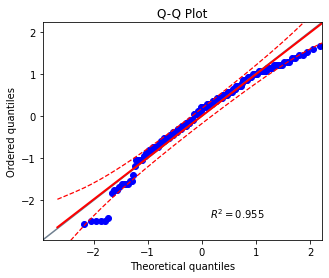

In [32]:
# проверим на нормальность распределение пользовательских оценок для XOne
pg.qqplot([df_good_actual_x_one['user_score']], dist='norm')

<AxesSubplot:title={'center':'Q-Q Plot'}, xlabel='Theoretical quantiles', ylabel='Ordered quantiles'>

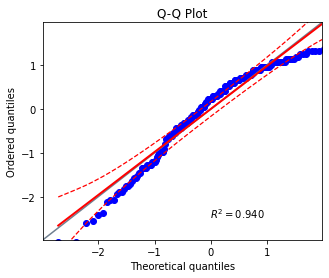

In [33]:
# проверим на нормальность распределение пользовательских оценок для PC
pg.qqplot([df_good_actual_pc['user_score']], dist='norm')

<AxesSubplot:title={'center':'Q-Q Plot'}, xlabel='Theoretical quantiles', ylabel='Ordered quantiles'>

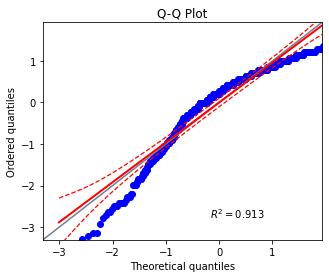

In [34]:
# проверим на нормальность распределение пользовательских оценок для Action
pg.qqplot([df_good_actual_action['user_score']], dist='norm')

<AxesSubplot:title={'center':'Q-Q Plot'}, xlabel='Theoretical quantiles', ylabel='Ordered quantiles'>

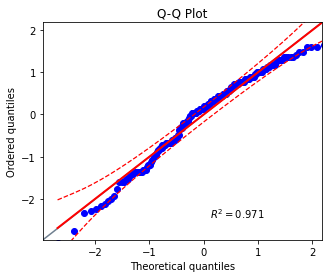

In [35]:
# проверим на нормальность распределение пользовательских оценок для Sports
pg.qqplot([df_good_actual_sports['user_score']], dist='norm')

Рассмотрев наши выборки мы видим, что они распределены не нормально, но ввиду того, что размер наших выборок гораздо больше 30 будем расчитывать, что ttest отработает корректно.

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

In [36]:
# проверка гипотезы - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
alpha = .05
results = st.ttest_ind(
    df_good_actual_x_one['user_score'], 
    df_good_actual_pc['user_score'],
    equal_var = False)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

print()
print('x_one', '\n', df_good_actual_x_one['user_score'].describe())

print()
print('pc', '\n', df_good_actual_pc['user_score'].describe())

p-значение:  0.5489537965134912
Не получилось отвергнуть нулевую гипотезу

x_one 
 count    182.000000
mean       6.521429
std        1.380941
min        1.600000
25%        5.800000
50%        6.800000
75%        7.500000
max        9.200000
Name: user_score, dtype: float64

pc 
 count    206.000000
mean       6.428641
std        1.664465
min        1.400000
25%        5.500000
50%        6.800000
75%        7.700000
max        9.300000
Name: user_score, dtype: float64


In [37]:
# Проверим гипотезу - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые с помощью mannwhitneyu
mannwhitneyu(df_good_actual_x_one['user_score'], 
             df_good_actual_pc['user_score'])

MannwhitneyuResult(statistic=18558.0, pvalue=0.8649062974699414)

Критерий Манна-Уитни  также показал, что принимаем нулевую гипотезу, так как pvalue > 0.05.

  0%|          | 0/1000 [00:00<?, ?it/s]

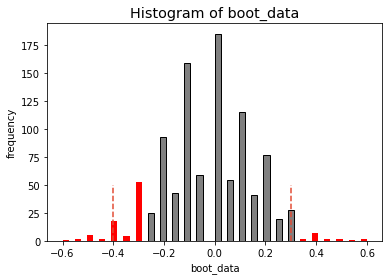

{'boot_data': [-0.10000000000000053,
  0.10000000000000053,
  0.1499999999999999,
  0.10000000000000053,
  0.10000000000000053,
  -0.2999999999999998,
  -0.20000000000000062,
  0.1499999999999999,
  0.04999999999999982,
  0.10000000000000053,
  -0.14999999999999947,
  -0.25000000000000044,
  -0.19999999999999973,
  -0.04999999999999982,
  -0.39999999999999947,
  0.050000000000000266,
  0.2999999999999998,
  0.40000000000000013,
  0.1999999999999993,
  0.0,
  0.10000000000000009,
  -0.20000000000000018,
  -0.04999999999999982,
  -0.1999999999999993,
  -0.39999999999999947,
  0.10000000000000009,
  0.0,
  -0.1999999999999993,
  -0.6000000000000005,
  -0.09999999999999964,
  -0.30000000000000027,
  -0.20000000000000018,
  0.0,
  -0.04999999999999982,
  -0.2999999999999994,
  -0.40000000000000036,
  0.24999999999999956,
  0.04999999999999982,
  0.1499999999999999,
  -0.04999999999999982,
  0.04999999999999982,
  0.0,
  -0.19999999999999973,
  -0.2999999999999998,
  -0.3999999999999999,
  0

In [38]:
# проверка гипотез с помощью bootstrap median уровень значимости 0.95

get_bootstrap(
    df_good_actual_x_one['user_score'], # числовые значения первой выборки
    df_good_actual_pc['user_score'], # числовые значения второй выборки
    boot_it = 1000, # количество бутстрэп-подвыборок
    statistic = np.median, # интересующая нас статистика
    bootstrap_conf_level = 0.95 # уровень значимости
)

bootstrap также показал, что необходимо принять нулевую гипотезу, так как 0 входит в доверительный интервал.

### Средние пользовательские рейтинги жанров Action и Sports разные

In [39]:
#проверка гипотезы - Средние пользовательские рейтинги жанров Action и Sports разные
alpha = .05
results = st.ttest_ind(
    df_good_actual_action['user_score'], 
    df_good_actual_sports['user_score'],
    equal_var = False)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

print()
print('action', '\n', df_good_actual_action['user_score'].describe())

print()
print('sports', '\n', df_good_actual_sports['user_score'].describe())

p-значение:  4.24307776572644e-20
Отвергаем нулевую гипотезу

action 
 count    523.000000
mean       6.825048
std        1.374440
min        1.600000
25%        6.250000
50%        7.100000
75%        7.800000
max        9.100000
Name: user_score, dtype: float64

sports 
 count    195.000000
mean       5.455897
std        1.738646
min        0.200000
25%        4.300000
50%        5.700000
75%        6.800000
max        8.800000
Name: user_score, dtype: float64


In [40]:
# Проверим гипотезу - Средние пользовательские рейтинги жанров Action и Sports разные с помощью mannwhitneyu
mannwhitneyu(df_good_actual_action['user_score'], 
             df_good_actual_sports['user_score'])

MannwhitneyuResult(statistic=75775.0, pvalue=1.1428765201928685e-23)

Критерий Манна-Уитни  также показал, что не принимаем нулевую гипотезу, так как pvalue < 0.05.

  0%|          | 0/1000 [00:00<?, ?it/s]

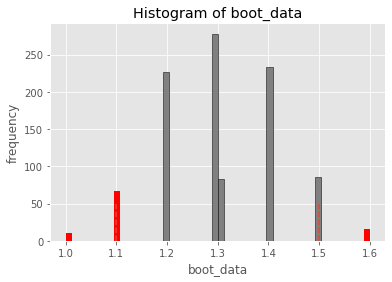

{'boot_data': [1.2000000000000002,
  1.4,
  1.5,
  1.2999999999999998,
  1.4,
  1.3999999999999995,
  1.5,
  1.5,
  1.4000000000000004,
  1.2999999999999998,
  1.0999999999999996,
  1.2999999999999998,
  1.5999999999999996,
  1.4000000000000004,
  1.1999999999999993,
  1.0999999999999996,
  1.2000000000000002,
  1.2000000000000002,
  1.2999999999999998,
  1.4000000000000004,
  1.4000000000000004,
  1.4999999999999991,
  1.299999999999999,
  1.1000000000000005,
  1.2999999999999998,
  1.2999999999999998,
  1.2999999999999998,
  1.1000000000000005,
  1.2999999999999998,
  1.2999999999999998,
  1.2999999999999998,
  1.2000000000000002,
  1.2999999999999998,
  1.2000000000000002,
  1.2000000000000002,
  1.3999999999999995,
  1.2999999999999998,
  1.3999999999999995,
  1.3999999999999995,
  1.2999999999999998,
  1.5999999999999996,
  1.2999999999999998,
  1.5999999999999996,
  1.1000000000000005,
  1.2000000000000002,
  1.0999999999999996,
  1.4000000000000004,
  1.3999999999999995,
  1.299

In [41]:
# проверка гипотез с помощью bootstrap median уровень значимости 0.95

get_bootstrap(
    df_good_actual_action['user_score'], # числовые значения первой выборки
    df_good_actual_sports['user_score'], # числовые значения второй выборки
    boot_it = 1000, # количество бутстрэп-подвыборок
    statistic = np.median, # интересующая нас статистика
    bootstrap_conf_level = 0.95 # уровень значимости
)

bootstrap также показал, что мы не принимаем нулевую гипотезу, так как 0 не входит в доверительный интервал.

### Вывод

У нас есть две гипотезы, сформулируем для них нулевую и алтернативную гипотезы:

**Средние пользовательские рейтинги платформ Xbox One и PC одинаковые:**
* $H_0$ - средние пользовательские рейтинги платформ Xbox One и PC равны.
* $H_1$ - средние пользовательские рейтинги платформ Xbox One и PC не равны.

**Средние пользовательские рейтинги жанров Action и Sports разные:**
* $H_0$ - средние пользовательские рейтинги жанров Action и Sports равны.
* $H_1$ - средние пользовательские рейтинги жанров Action и Sports не равны.

Для проверки гипотез использовали t-критерий Стьюдента, критерий Манна-Уитни и bootstrap. Пороговое значение для p-value определим как 5%, ввиду того, что в данном исследовании сверхточность не требуется. Все они показали одиниковые результаты, поэтому принимаем следующие гипотезы:

**Средние пользовательские рейтинги платформ Xbox One и PC одинаковые:**
* $H_0$ - средние пользовательские рейтинги платформ Xbox One и PC равны.

**Средние пользовательские рейтинги жанров Action и Sports разные:**
* $H_1$ - средние пользовательские рейтинги жанров Action и Sports не равны.


## Общий вывод

На основании вышеизложенных подвыводов мы можем попытаться обрисовать портрет потенциально упешной игры на которые следует спланировать рекламные компании:
* для всех регионов, кроме Японии, потенциально упешные игры это игры выпущенные на платформах PS4, XOne, жанра Shooter, с рейтингом М(17+ лет), которые будут иметь положительный отклик у критиков.
* для Японии это игры выпущенные на платформе 3DS, жанра Role-Playing или Action, с рейтингом E(6+ лет) или Т(13+ лет), которые будут иметь положительный отклик у критиков и пользователей.